# Gaussian Mixture Models: the Notebook

http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GMM.html

This notebook is an opportunity to try out related to GMMs. 

In [6]:
import sklearn
sklearn.__version__

'1.0.2'

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
#from sklearn.lda import LDA
#from sklearn.qda import QDA

from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans 

The mean(s) estimated with this 5 component GaussianMixture: 
 [[3.57807364 1.37080878 0.96544874]
 [1.10581092 5.15610348 0.98087872]
 [0.92081671 1.69142084 0.63229375]
 [1.1333505  0.46033688 1.54571227]
 [2.47248277 2.58664465 1.09590528]]


The covariances [SEE THE DOCS] estimated with this 5 component GaussianMixture: 
 [[[ 0.78417575  0.20555066  0.08501637]
  [ 0.20555066  0.7757443   0.076639  ]
  [ 0.08501637  0.076639    0.94281659]]

 [[ 0.90126123 -0.00583078  0.00246541]
  [-0.00583078  0.82083126  0.0076112 ]
  [ 0.00246541  0.0076112   0.99130169]]

 [[ 0.82482863 -0.08602158 -0.02612826]
  [-0.08602158  0.45316336  0.15460594]
  [-0.02612826  0.15460594  0.6834158 ]]

 [[ 1.10875405  0.10474367  0.21265844]
  [ 0.10474367  0.7585914   0.31708819]
  [ 0.21265844  0.31708819  0.97051816]]

 [[ 0.7285284   0.21928342 -0.24312777]
  [ 0.21928342  0.61642327  0.08845812]
  [-0.24312777  0.08845812  0.9454013 ]]]


Text(0.5, 1.0, 'Mysterious Rabbit Data')

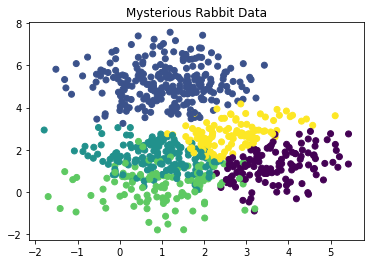

In [12]:
# data generation
np.random.seed(1)

covar = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]

dat_threedee = np.vstack((np.random.multivariate_normal([1, 1, 1], covar, 250), 
                          np.random.multivariate_normal([1, 5, 1], covar, 250),
                          np.random.multivariate_normal([3, 2, 1], covar, 250)))

dat_twodee = np.vstack((np.random.multivariate_normal([0, 0], [[10, 0], [0, 1]], 100),
                        np.random.multivariate_normal([0, 5], [[1, 2], [2, 1]], 100),
                        np.random.multivariate_normal([5, 5], [[5, 3], [3, 2]], 100)))

dat_twodee_simple = np.vstack((np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100),
                               np.random.multivariate_normal([0, 5], [[1, 0], [0, 1]], 100),
                               np.random.multivariate_normal([5, 5], [[2, 0], [0, 2]], 100)))

dat_twodee_headache = np.vstack((np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100),
                                 np.random.multivariate_normal([0, 1], [[1, 0], [0, 1]], 100),
                                 np.random.multivariate_normal([1, 1], [[2, 0], [0, 2]], 100)))

dat = dat_threedee

comps = 5
gm_mod = GaussianMixture(n_components = comps)

gm_mod.fit(dat)
y_hat = gm_mod.predict(dat)

print ("The mean(s) estimated with this", comps, "component GaussianMixture: \n", gm_mod.means_)

print ("\n\nThe covariances [SEE THE DOCS] estimated with this", comps, "component GaussianMixture: \n", gm_mod.covariances_)

cm_bright = ListedColormap(['#FF0000', '#0000FF'])
p = plt.subplot(1, 1, 1)
p.scatter(dat[:, 0], dat[:, 1], c=y_hat) #cmap=cm_bright)
plt.title("Mysterious Rabbit Data")

## GMM vs Kmeans vs Agglomerative Clustering

The goal of this question is to directly compare GMMs to other clustering techniques, and get an intuitive sense of the differences.

Links to docs for kmeans and agglomerative clustering:
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

1. Compare the results you see with GMM, KMeans, and AgglomerativeClustering (use all the three linkage types). Some demos are provided below. Try different numbers of clusters for all these algorithms. What differences do you see between the methods? Which one would you recommend using? Don't worry about trying to numerically score the models here, just use plots and your visual judgement.

2. Try this again with the data: dat_twodee_simple and dat_twodee_headache; do you see any differences?

Text(0.5, 1.0, 'Agglomerative (complete)')

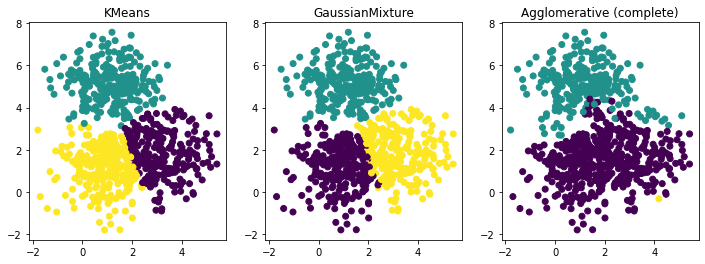

In [10]:
n_clusters = 3
km = KMeans(n_clusters=n_clusters)
km.fit(dat)

gm_mod = GaussianMixture(n_components = n_clusters)
gm_mod.fit(dat)

ag = AgglomerativeClustering(n_clusters = n_clusters, affinity="euclidean", linkage = "average")

cm_bright = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFFFF'])

plt.figure(figsize=(12, 4))

p = plt.subplot(1, 3, 1)
p.scatter(dat[:, 0], dat[:, 1], c=km.predict(dat)) #, cmap=cm_bright)
plt.title('KMeans') 

p = plt.subplot(1, 3, 2)
p.scatter(dat[:, 0], dat[:, 1], c=gm_mod.predict(dat)) #, cmap=cm_bright)
plt.title('GaussianMixture') 

p = plt.subplot(1, 3, 3)
p.scatter(dat[:, 0], dat[:, 1], c=ag.fit_predict(dat)) # , cmap=cm_bright)
plt.title('Agglomerative (complete)') 

